In [1]:
## Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("E-commerce.csv")

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


In [6]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [9]:
df.count()

index                 128975
Order ID              128975
Date                  128975
Status                128975
Fulfilment            128975
Sales Channel         128975
ship-service-level    128975
Style                 128975
SKU                   128975
Category              128975
Size                  128975
ASIN                  128975
Courier Status        122103
Qty                   128975
currency              121180
Amount                121180
ship-city             128942
ship-state            128942
ship-postal-code      128942
ship-country          128942
promotion-ids          79822
B2B                   128975
fulfilled-by           39277
Unnamed: 22            79925
dtype: int64

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool

In [11]:
import pandas as pd

# Example dataset
data = {"customer_name": ["A", "B", "A", "C", "B", "A"]}
df = pd.DataFrame(data)

# Count customer occurrences
print("Dataset:\n", df["customer_name"].value_counts())


Dataset:
 A    3
B    2
C    1
Name: customer_name, dtype: int64


In [12]:
import pandas as pd

# Example data
data = {"customer_name": ["A", "B", "A", "C", "B", "A"], "orders": [2, 5, 3, 1, 4, 2]}
df = pd.DataFrame(data)

# print dataset
print("Dataset:\n", df)

# values of DataFrame (as array)
print("\nAll values:\n", df.values)

# count frequency of customer names
print("\nCustomer counts:\n", df["customer_name"].value_counts())


Dataset:
   customer_name  orders
0             A       2
1             B       5
2             A       3
3             C       1
4             B       4
5             A       2

All values:
 [['A' 2]
 ['B' 5]
 ['A' 3]
 ['C' 1]
 ['B' 4]
 ['A' 2]]

Customer counts:
 A    3
B    2
C    1
Name: customer_name, dtype: int64


In [13]:
x=df.iloc[:,:-1].values
y=df.iloc[:,:3].values
print('x:%s'%(str(x)))
print('-------------')
print('y:%s'%(str(y)))

x:[['A']
 ['B']
 ['A']
 ['C']
 ['B']
 ['A']]
-------------
y:[['A' 2]
 ['B' 5]
 ['A' 3]
 ['C' 1]
 ['B' 4]
 ['A' 2]]


In [14]:
print('df:%s'%(str(df.shape)))

df:(6, 2)


In [19]:
df.columns = df.columns.str.strip()       # remove extra spaces
df.columns = df.columns.str.lower()       # make lowercase
print(df.columns)


Index(['customer_name', 'orders'], dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans

# Optional: for interactive treemap
try:
    import plotly.express as px
    PLOTLY_AVAILABLE = True
except Exception:
    PLOTLY_AVAILABLE = False


In [39]:
DATA_PATH = "/mnt/data/E-commerce.csv"   # change if necessary
PLOTS_DIR = "./plots"
RANDOM_STATE = 42

os.makedirs(PLOTS_DIR, exist_ok=True)


In [40]:
print("Loading dataset:", 'E-commerce.csv')
df = pd.read_csv('E-commerce.csv')
print("Loaded shape:", df.shape)



Loading dataset: E-commerce.csv
Loaded shape: (128975, 24)


In [41]:
print("\n=== HEAD ===")
print(df.head())



=== HEAD ===
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ... 

In [42]:
print("\n=== TAIL ===")
print(df.tail())



=== TAIL ===
         index             Order ID      Date   Status Fulfilment  \
128970  128970  406-6001380-7673107  05-31-22  Shipped     Amazon   
128971  128971  402-9551604-7544318  05-31-22  Shipped     Amazon   
128972  128972  407-9547469-3152358  05-31-22  Shipped     Amazon   
128973  128973  402-6184140-0545956  05-31-22  Shipped     Amazon   
128974  128974  408-7436540-8728312  05-31-22  Shipped     Amazon   

       Sales Channel  ship-service-level    Style             SKU  \
128970      Amazon.in          Expedited  JNE3697   JNE3697-KR-XL   
128971      Amazon.in          Expedited   SET401  SET401-KR-NP-M   
128972      Amazon.in          Expedited    J0157    J0157-DR-XXL   
128973      Amazon.in          Expedited    J0012    J0012-SKD-XS   
128974      Amazon.in          Expedited    J0003     J0003-SET-S   

             Category  ... currency  Amount  ship-city    ship-state  \
128970          kurta  ...      INR   517.0  HYDERABAD     TELANGANA   
128971      

In [43]:
print("\n=== INFO ===")
df.info()



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              

In [44]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all').T)



=== DESCRIBE ===
                       count  unique  \
index               128975.0     NaN   
Order ID              128975  120378   
Date                  128975      91   
Status                128975      13   
Fulfilment            128975       2   
Sales Channel         128975       2   
ship-service-level    128975       2   
Style                 128975    1377   
SKU                   128975    7195   
Category              128975       9   
Size                  128975      11   
ASIN                  128975    7190   
Courier Status        122103       3   
Qty                 128975.0     NaN   
currency              121180       1   
Amount              121180.0     NaN   
ship-city             128942    8955   
ship-state            128942      69   
ship-postal-code    128942.0     NaN   
ship-country          128942       1   
promotion-ids          79822    5787   
B2B                   128975       2   
fulfilled-by           39277       1   
Unnamed: 22           

In [45]:
print("\n=== NULL COUNTS ===")
print(df.isnull().sum().sort_values(ascending=False).head(30))


=== NULL COUNTS ===
fulfilled-by          89698
promotion-ids         49153
Unnamed: 22           49050
currency               7795
Amount                 7795
Courier Status         6872
ship-country             33
ship-postal-code         33
ship-state               33
ship-city                33
ship-service-level        0
Style                     0
Date                      0
B2B                       0
Status                    0
Fulfilment                0
Sales Channel             0
Qty                       0
Order ID                  0
ASIN                      0
Size                      0
Category                  0
SKU                       0
index                     0
dtype: int64


In [46]:
# Clean column names: strip spaces, lowercase
df.columns = df.columns.str.strip()
# (Optionally) print cleaned columns
print("\nColumns:", list(df.columns))



Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [47]:
# ---------- QUICK VALUE COUNTS (top categorical columns) ----------
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns found:", cat_cols[:10])
for c in cat_cols[:8]:
    print(f"\nTop values for {c}:")
    print(df[c].value_counts().head(10))




Categorical columns found: ['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size']

Top values for Order ID:
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
406-9002076-4152331     9
404-3701762-8241125     9
171-4310662-2005103     9
408-2964501-8373155     9
171-0706521-2133101     9
Name: Order ID, dtype: int64

Top values for Date:
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
04-20-22    1850
04-23-22    1816
04-24-22    1810
05-01-22    1809
04-16-22    1759
Name: Date, dtype: int64

Top values for Status:
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to 

In [48]:
# ---------- PREPROCESS / SELECT NUMERIC COLUMNS ----------
# Find numeric-like columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols)

# If Amount or Qty columns are missing, try fuzzy match
def find_col_like(df, patterns):
    cols = df.columns.tolist()
    for pat in patterns:
        for c in cols:
            if pat.lower() in c.lower():
                return c
    return None

qty_col = find_col_like(df, ["qty", "quantity", "quantityordered", "orderedquantity"])
amount_col = find_col_like(df, ["amount", "price", "sales", "order_value", "total", "value", "amt"])

print("\nDetected qty column:", qty_col)
print("Detected amount column:", amount_col)



Numeric columns: ['index', 'Qty', 'Amount', 'ship-postal-code']

Detected qty column: Qty
Detected amount column: Amount


In [49]:
# If numeric columns not in numeric_cols, try convert:
if qty_col and qty_col not in numeric_cols:
    df[qty_col] = pd.to_numeric(df[qty_col], errors='coerce')
if amount_col and amount_col not in numeric_cols:
    df[amount_col] = pd.to_numeric(df[amount_col], errors='coerce')



In [50]:
# Update numeric_cols
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Final numeric columns:", numeric_cols)

# ---------- HANDLE MISSING VALUES ----------
# Simple strategy: drop columns that are mostly empty, fill numeric with median, categorical with mode
threshold = 0.6 * len(df)  # require at least 60% non-null
keep_cols = [c for c in df.columns if df[c].notna().sum() >= threshold]
drop_cols = [c for c in df.columns if c not in keep_cols]
print("\nDropping very-sparse columns:", drop_cols)
df = df[keep_cols].copy()


Final numeric columns: ['index', 'Qty', 'Amount', 'ship-postal-code']

Dropping very-sparse columns: ['fulfilled-by']


In [51]:
# Fill numeric
for c in df.select_dtypes(include=[np.number]).columns:
    df[c] = df[c].fillna(df[c].median())

# Fill categorical
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].fillna(df[c].mode().iloc[0] if not df[c].mode().empty else "")

print("\nAfter filling missing values, null counts:\n", df.isnull().sum().sum())




After filling missing values, null counts:
 0


In [52]:
# ---------- PLOTS (EDA) ----------
sns.set(style="whitegrid", palette="muted", font_scale=1.0)

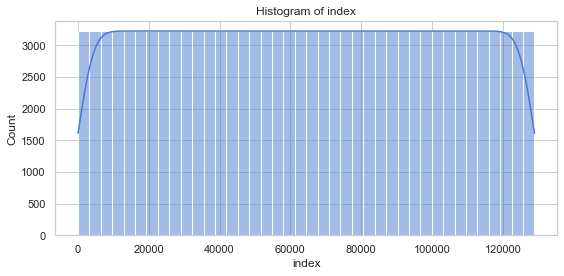

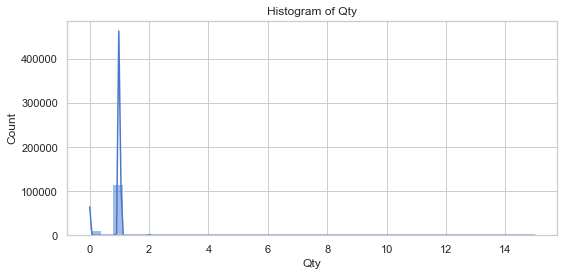

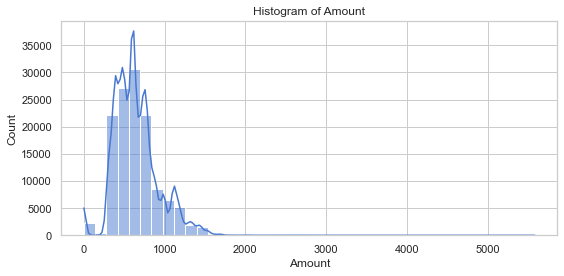

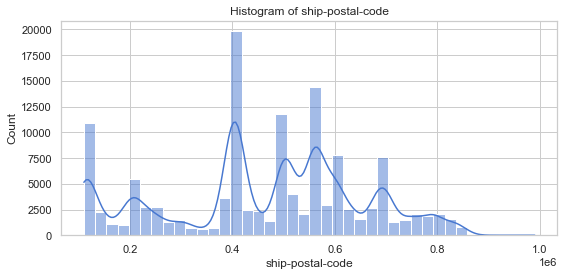

In [56]:

# 1. Histogram for numeric columns (top 4)
num_to_plot = df.select_dtypes(include=[np.number]).columns.tolist()[:6]
for c in num_to_plot:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c], bins=40, kde=True)
    plt.title(f"Histogram of {c}")
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/hist_{c}.png")
    plt.show()     # पहले दिखाओ
    plt.close()    # फिर बंद करो



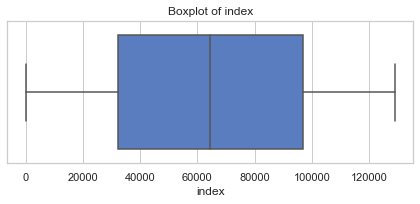

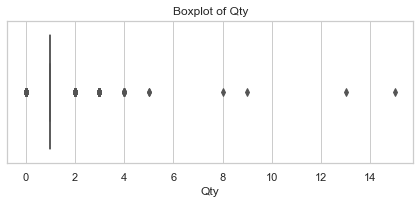

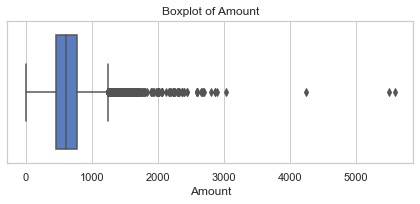

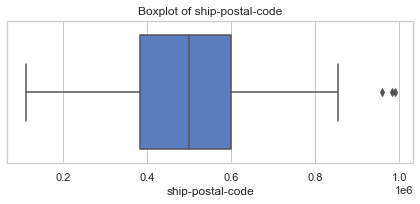

In [57]:
# 2. Boxplots for numeric columns
for c in num_to_plot:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[c])
    plt.title(f"Boxplot of {c}")
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/box_{c}.png")
    plt.show()
    plt.close()


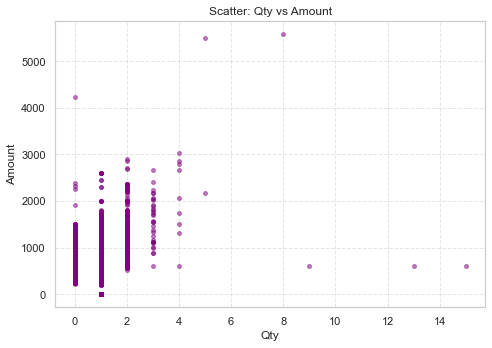

In [59]:
# 3. Scatter: Qty vs Amount (if both found)
if qty_col and amount_col:
    plt.figure(figsize=(7,5))
    plt.scatter(df[qty_col], df[amount_col], c='purple', alpha=0.5, s=15)
    plt.xlabel(qty_col); plt.ylabel(amount_col); plt.title(f"Scatter: {qty_col} vs {amount_col}")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/scatter_{qty_col}_vs_{amount_col}.png")
    plt.show()
    plt.close()
else:
    print("Skipping Qty vs Amount scatter: columns not detected.")


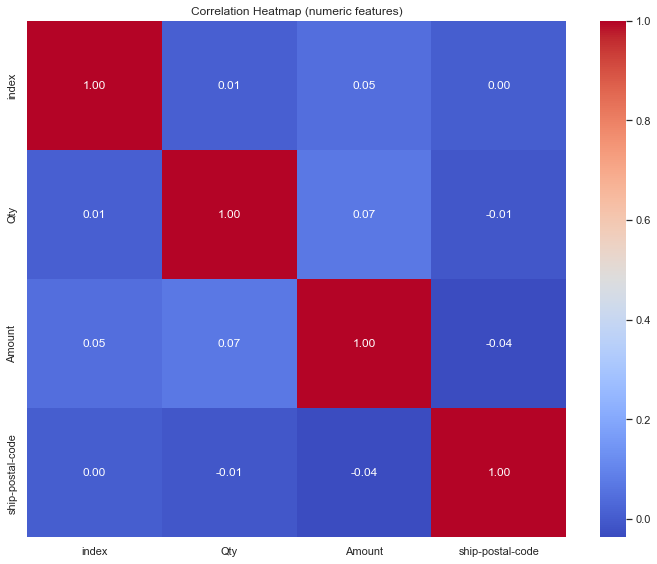

In [62]:
# 4. Correlation heatmap (numeric)
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/heatmap_numeric.png")
plt.show()
plt.close()

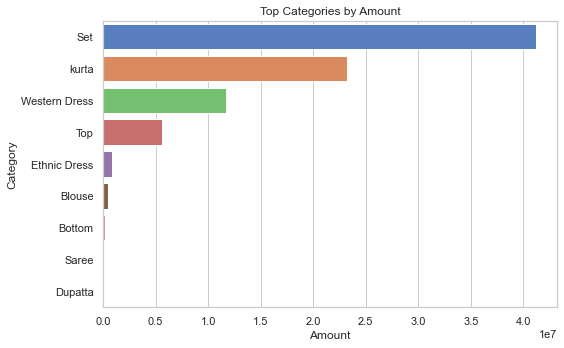

In [64]:
# 5. Bar chart: top categories by amount (if category col exists)
cat_col = find_col_like(df, ["category", "cat", "department"])
if cat_col and amount_col:
    category_sales = df.groupby(cat_col)[amount_col].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=category_sales.values, y=category_sales.index)
    plt.title(f"Top Categories by {amount_col}")
    plt.xlabel(amount_col)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/bar_top_categories.png")
    plt.show()
    plt.close()
else:
    print("Skipping category bar chart: category or amount column not detected.")



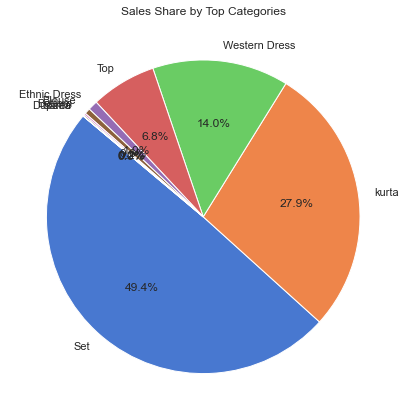

In [66]:
# 6. Pie chart (top categories)
if cat_col and amount_col:
    top = category_sales
    plt.figure(figsize=(6,6))
    plt.pie(top.values, labels=top.index, autopct='%1.1f%%', startangle=140)
    plt.title("Sales Share by Top Categories")
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/pie_top_categories.png")
    plt.show()
    plt.close()



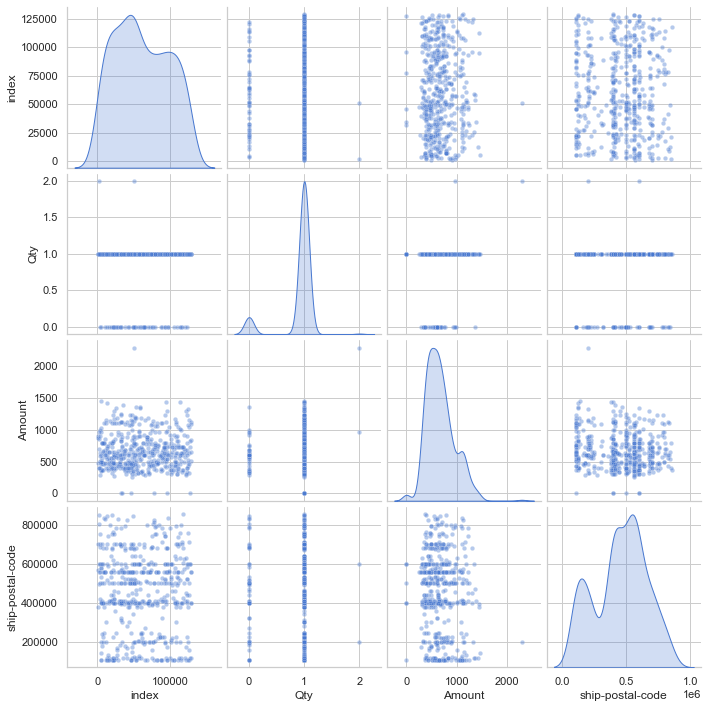

In [67]:
# 7. Pairplot for small numeric subset
num_small = df.select_dtypes(include=[np.number]).columns.tolist()[:4]
if len(num_small) >= 2:
    sns.pairplot(df[num_small].sample(min(500, len(df))), diag_kind="kde", plot_kws={'alpha':0.4, 's':20})
    plt.savefig(f"{PLOTS_DIR}/pairplot.png")
    plt.show()
    plt.close()

In [68]:
# Optional: Plotly treemap
if PLOTLY_AVAILABLE and cat_col and amount_col:
    try:
        fig = px.treemap(df, path=[cat_col], values=amount_col, title="Treemap: Categories")
        fig.write_image(f"{PLOTS_DIR}/treemap_categories.png")
    except Exception as e:
        print("Plotly treemap error:", e)

print(f"\nSaved plots to {PLOTS_DIR} (histograms, boxplots, scatter, heatmap, etc.)")

Plotly treemap error: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Saved plots to ./plots (histograms, boxplots, scatter, heatmap, etc.)
